In [28]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

df = pd.read_csv('강남구전세데이터_찐마지막.csv')
df.head()

,AD_Code,Admin_District,Area,YearBuilt,Type,Floor,Address,Cont_Date,Age,Latitude,Longitude,Star_Cnt,Michelin_Cnt,Mc_cnt,Bigstore_cnt,InterestRate,Market_cnt,Subway_cnt,Kinder_cnt,y
0,0,개포동,44.0,1989,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-06-01,34,37.473722,127.052725,0,0,0,0,4.04,0,0,2,7500
1,0,개포동,44.0,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-10-05,32,37.473722,127.052725,0,0,0,0,4.82,0,0,2,14333
2,0,개포동,44.0,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-07-07,32,37.473722,127.052725,0,0,0,0,4.16,0,0,2,17115
3,0,개포동,44.0,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-07-07,32,37.473722,127.052725,0,0,0,0,4.16,0,0,2,17640
4,0,개포동,44.0,1989,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-06-01,34,37.473722,127.052725,0,0,0,0,4.04,0,0,2,7500


In [2]:
import warnings

# 경고 무시하기
warnings.filterwarnings("ignore")
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'# (위도우용)

In [3]:
df.groupby(['Address','Admin_District'])['y'].mean().sort_values(ascending=False).reset_index()

,Address,Admin_District,y
0,서울특별시 강남구 압구정로79길 88,청담동,1.015000e+06
1,서울특별시 강남구 압구정로75길 27,청담동,7.000000e+05
2,서울특별시 강남구 도산대로99길 68,청담동,6.033333e+05
3,서울특별시 강남구 압구정로79길 87,청담동,4.500000e+05
4,서울특별시 강남구 영동대로142길 19,청담동,4.450000e+05
...,...,...,...
3737,서울특별시 강남구 논현로113길 8,논현동,3.000000e+03
3738,서울특별시 강남구 논현로20길 12,개포동,3.000000e+03
3739,서울특별시 강남구 도곡로87길 21,대치동,3.000000e+03
3740,서울특별시 강남구 역삼로92길 34-1,대치동,2.700000e+03


In [4]:
df.groupby(['Address','Area'])['y'].mean().sort_values(ascending=False).reset_index()

,Address,Area,y
0,서울특별시 강남구 압구정로79길 88,273.96,1015000.0
1,서울특별시 강남구 도산대로99길 68,219.96,710000.0
2,서울특별시 강남구 압구정로75길 27,219.43,700000.0
3,서울특별시 강남구 도산대로99길 68,182.58,600000.0
4,서울특별시 강남구 도산대로99길 68,171.60,500000.0
...,...,...,...
9842,서울특별시 강남구 논현로161길 41,14.80,2000.0
9843,서울특별시 강남구 논현로115길 41,75.45,2000.0
9844,서울특별시 강남구 개포로138길 21,21.05,2000.0
9845,서울특별시 강남구 역삼로23길 8,60.27,1700.0


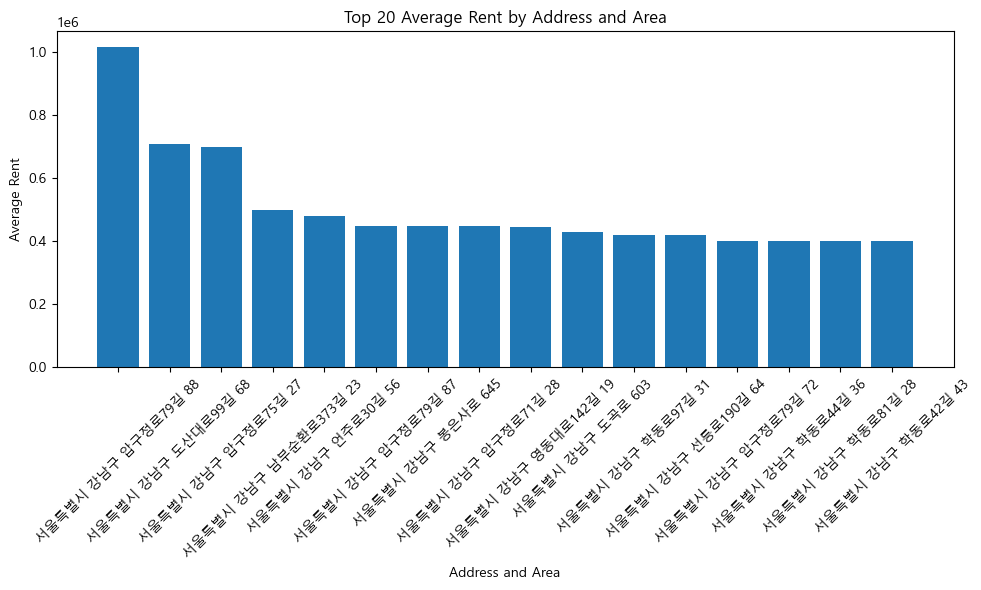

In [5]:
grouped_data = df.groupby(['Address', 'Area'])['y'].mean().sort_values(ascending=False).reset_index()

# 시각화
plt.figure(figsize=(10, 6))  # 그래프의 크기를 조정
plt.bar(grouped_data['Address'][:20], grouped_data['y'][:20])  # 상위 20개 데이터만 표시
plt.title('Top 20 Average Rent by Address and Area')
plt.xlabel('Address and Area')
plt.ylabel('Average Rent')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.show()

In [6]:
df.groupby(['Address','YearBuilt'])['y'].mean().sort_values(ascending=False).reset_index()

,Address,YearBuilt,y
0,서울특별시 강남구 압구정로79길 88,2020,1.015000e+06
1,서울특별시 강남구 압구정로75길 27,2022,7.000000e+05
2,서울특별시 강남구 도산대로99길 68,2019,6.033333e+05
3,서울특별시 강남구 압구정로79길 87,2006,4.500000e+05
4,서울특별시 강남구 영동대로142길 19,2010,4.450000e+05
...,...,...,...
5033,서울특별시 강남구 논현로95길,2003,2.000000e+03
5034,서울특별시 강남구 양재대로35길,1983,2.000000e+03
5035,서울특별시 강남구 양재대로37길,1985,1.500000e+03
5036,서울특별시 강남구 양재대로31길,1983,1.500000e+03


In [7]:
df.groupby(['Address','Type'])['y'].mean().sort_values(ascending=False).reset_index()

,Address,Type,y
0,서울특별시 강남구 압구정로79길 88,아파트,1.015000e+06
1,서울특별시 강남구 압구정로75길 27,아파트,7.000000e+05
2,서울특별시 강남구 도산대로99길 68,아파트,6.033333e+05
3,서울특별시 강남구 압구정로79길 87,아파트,4.500000e+05
4,서울특별시 강남구 영동대로142길 19,아파트,4.450000e+05
...,...,...,...
3781,서울특별시 강남구 논현로113길 8,연립다세대,3.000000e+03
3782,서울특별시 강남구 논현로20길 12,오피스텔,3.000000e+03
3783,서울특별시 강남구 도곡로87길 21,연립다세대,3.000000e+03
3784,서울특별시 강남구 역삼로92길 34-1,연립다세대,2.700000e+03


In [8]:
df.groupby(['Type'])['y'].mean().sort_values(ascending=False).reset_index()

,Type,y
0,아파트,79048.982080
1,연립다세대,31486.676003
2,오피스텔,25322.290608
3,단독다가구,21535.112542


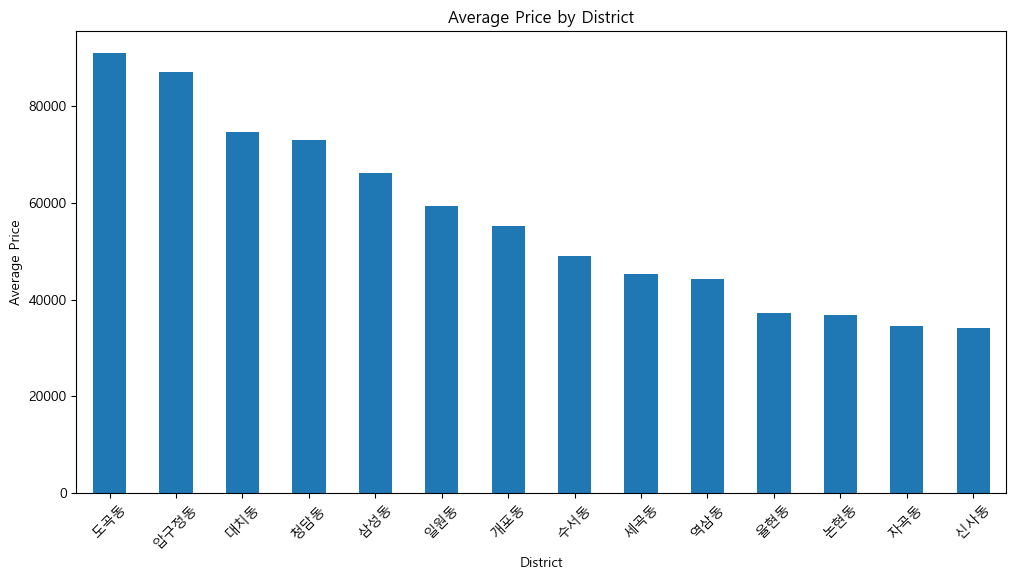

In [9]:
# 행정구별 가격 평균 계산
avg_price_by_district = df.groupby('Admin_District')['y'].mean()

# 시각화
plt.figure(figsize=(12, 6))
avg_price_by_district.sort_values(ascending=False).plot(kind='bar')
plt.title('Average Price by District')
plt.xlabel('District')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

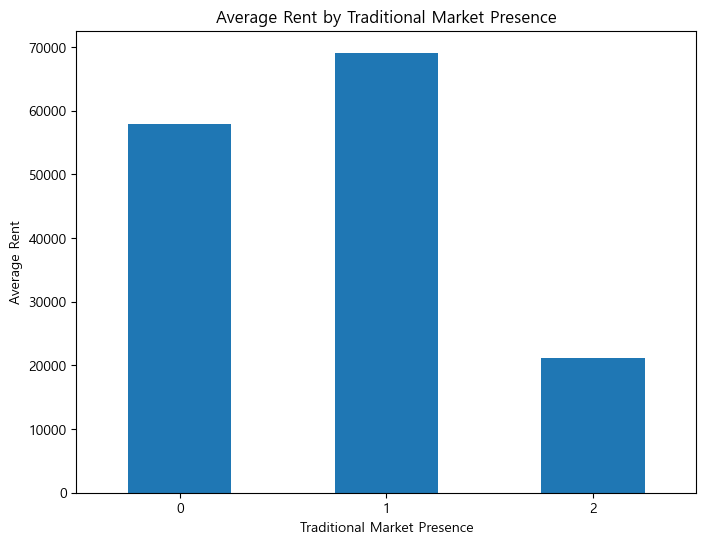

In [10]:
# 전통시장 여부에 따른 전세금 평균 계산
avg_y_by_market = df.groupby('Market_cnt')['y'].mean()

# 시각화
plt.figure(figsize=(8, 6))
avg_y_by_market.plot(kind='bar')
plt.title('Average Rent by Traditional Market Presence')
plt.xlabel('Traditional Market Presence')
plt.ylabel('Average Rent')
plt.xticks(rotation=0)
plt.show()

In [11]:
pip install geopandas folium

Note: you may need to restart the kernel to use updated packages.


In [12]:
# import requests

# # JavaScript 키
# javascript_key = 'b6656c6b9d28f8c8ead78ce937b2f594'

# # 카카오 API 요청
# url = f'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?x=126.982&y=37.5502&input_coord=WGS84'
# headers = {'Authorization': f'KakaoAK {javascript_key}'}
# response = requests.get(url, headers=headers)

# # 응답 결과 확인
# data = response.json()

# # Shapefile 링크 가져오기
# shapefile_link = data.get('documents', [{}])[0].get('region_meta', {}).get('href', 'Shapefile 링크를 찾을 수 없습니다.')
# print("Shapefile 링크:", shapefile_link)

In [13]:
# import pandas as pd
# import geopandas as gpd
# import folium
# from folium.plugins import MarkerCluster

# # CSV 파일 불러오기
# data = pd.read_csv('강남구전세데이터_찐마지막.csv')

# # 행정구 경계 데이터 불러오기
# gdf = gpd.read_file(r'C:\my_shapefiles\example_shapefile.shp')  # Shapefile 경로를 지정하세요

# # 행정구별 전세금 평균 계산
# avg_y_by_district = data.groupby('Admin_District')['y'].mean().reset_index()

# # 행정구 경계 데이터와 전세금 데이터 병합
# merged_data = pd.merge(gdf, avg_y_by_district, how='left', left_on='행정구명', right_on='Admin_District')

# # 지도 생성
# m = folium.Map(location=[37.5502, 126.982], zoom_start=11)  # 서울 좌표를 지정하고 줌 레벨 조정

# # 전세금 데이터를 마커로 추가
# marker_cluster = MarkerCluster().add_to(m)
# for idx, row in merged_data.iterrows():
#     if not pd.isnull(row['y']):  # 전세금 데이터가 있는 경우에만 마커 추가
#         folium.Marker(
#             location=[row.geometry.centroid.y, row.geometry.centroid.x],
#             popup=f"행정구: {row['행정구명']}\n평균 전세금: {row['y']:.2f} 만원",
#         ).add_to(marker_cluster)

# # 지도 저장
# m.save('rent_map.html')

Pivot Table:
Area                  11.3900   12.0400   12.1000   12.1100   12.1400   \
Address                                                                  
서울특별시 강남구                  NaN       NaN       NaN       NaN       NaN   
서울특별시 강남구 강남대로 240         NaN       NaN       NaN       NaN       NaN   
서울특별시 강남구 강남대로 256         NaN       NaN       NaN       NaN       NaN   
서울특별시 강남구 강남대로 272         NaN       NaN       NaN       NaN       NaN   
서울특별시 강남구 강남대로 324         NaN       NaN       NaN       NaN       NaN   
...                        ...       ...       ...       ...       ...   
서울특별시 강남구 헌릉로590길 88       NaN       NaN       NaN       NaN       NaN   
서울특별시 강남구 헌릉로618길          NaN       NaN       NaN       NaN       NaN   
서울특별시 강남구 헌릉로622길          NaN       NaN       NaN       NaN       NaN   
서울특별시 강남구 헌릉로637길          NaN       NaN       NaN       NaN       NaN   
서울특별시 강남구 헌릉로645길          NaN       NaN       NaN       NaN       NaN   

Area                  12

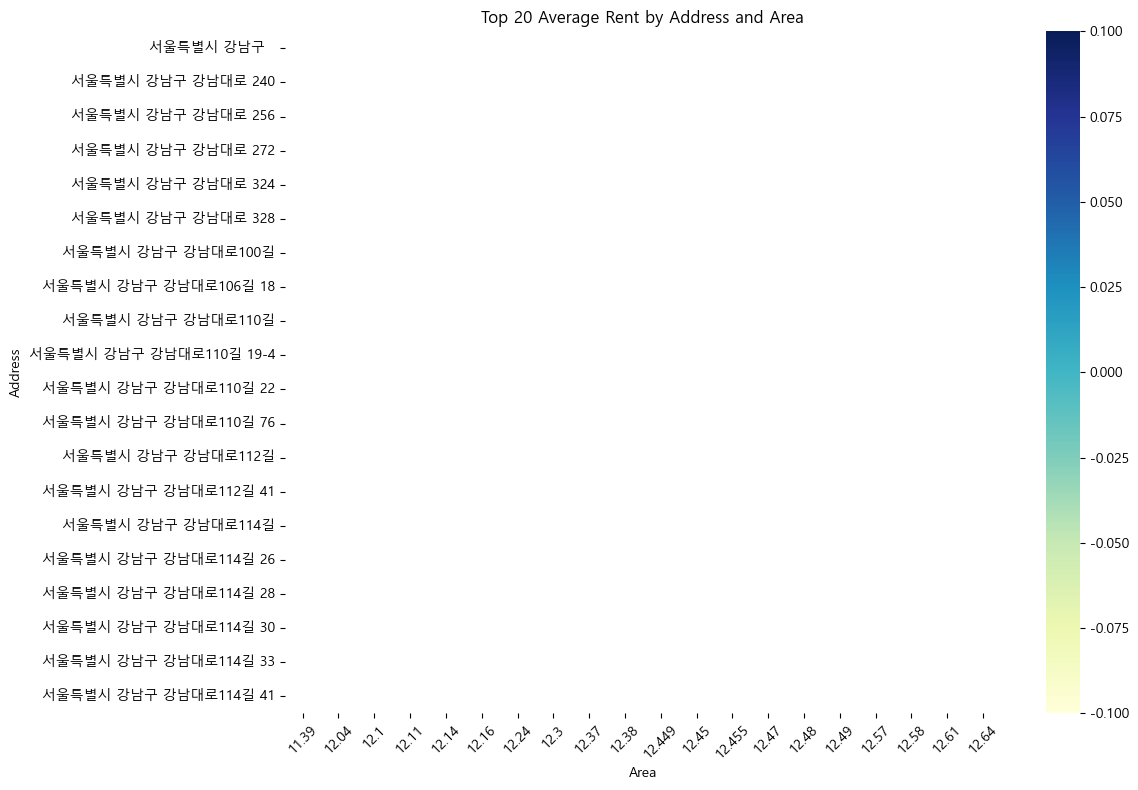

In [15]:
# 데이터 확인
print("Pivot Table:")
print(pivot_table)

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table.iloc[:20, :20], cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Top 20 Average Rent by Address and Area')
plt.xlabel('Area')
plt.ylabel('Address')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.show()

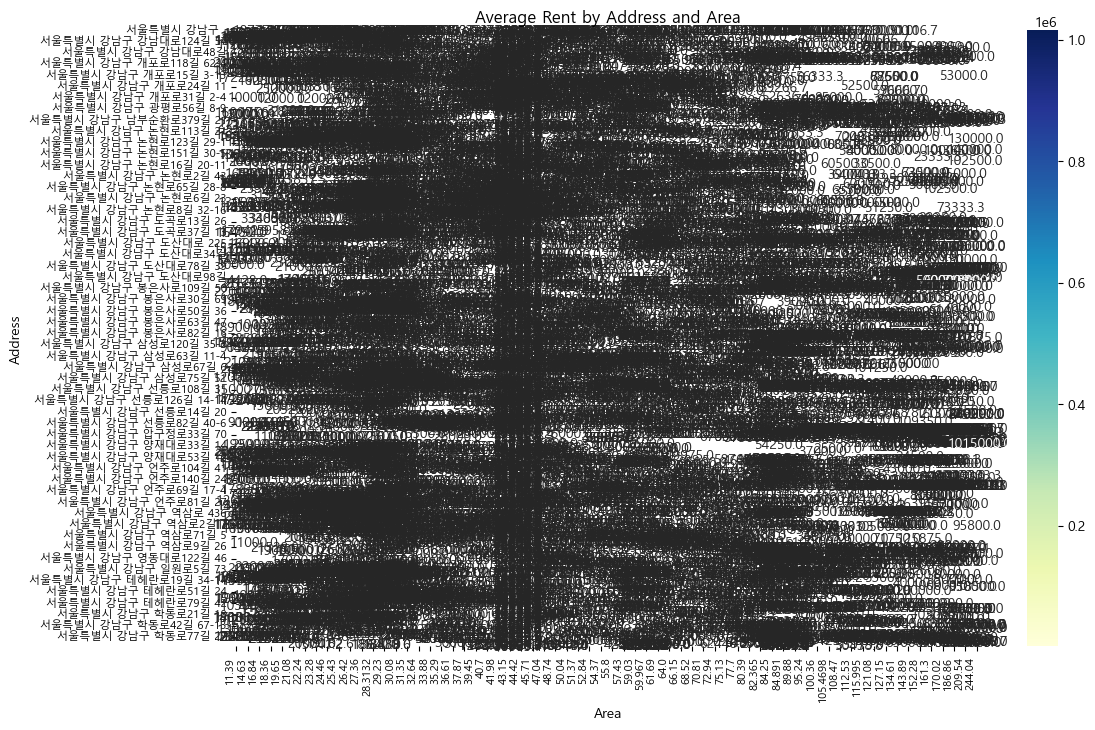

In [19]:
# 주소와 지역에 따른 전세금 평균 피벗 테이블 생성
pivot_table = grouped_data.pivot_table(index='Address', columns='Area', values='y')

# 히트맵 생성
plt.figure(figsize=(12, 8))

# X축 레이블 줄이고 스킵하기
x_labels = grouped_data['Address'][::10]  # 일부 레이블만 선택
plt.xticks(range(0, len(grouped_data['Address']), 10), x_labels, rotation=45, fontsize=8, ha='right')

# Y축 레이블 줄이고 스킵하기
y_labels = pivot_table.columns[::5]  # 일부 레이블만 선택
plt.yticks(range(0, len(pivot_table.columns), 5), y_labels, fontsize=8)

sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Average Rent by Address and Area')
plt.xlabel('Area')
plt.ylabel('Address')
plt.show()

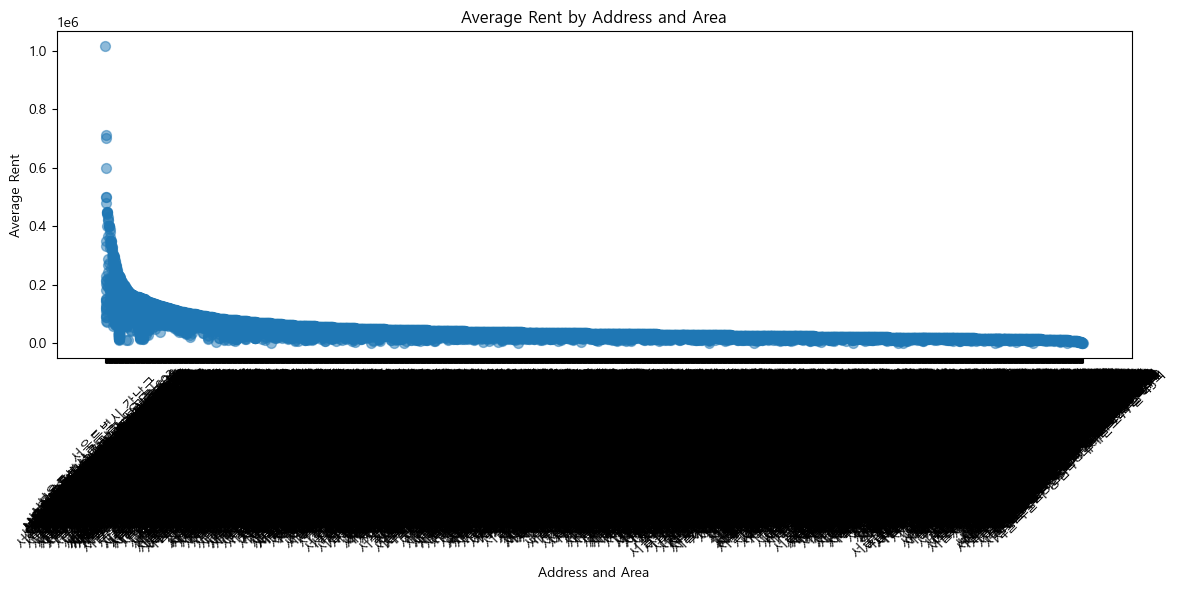

In [17]:
plt.figure(figsize=(12, 6))
plt.scatter(grouped_data['Address'], grouped_data['y'], s=30, alpha=0.5)
plt.title('Average Rent by Address and Area')
plt.xlabel('Address and Area')
plt.ylabel('Average Rent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

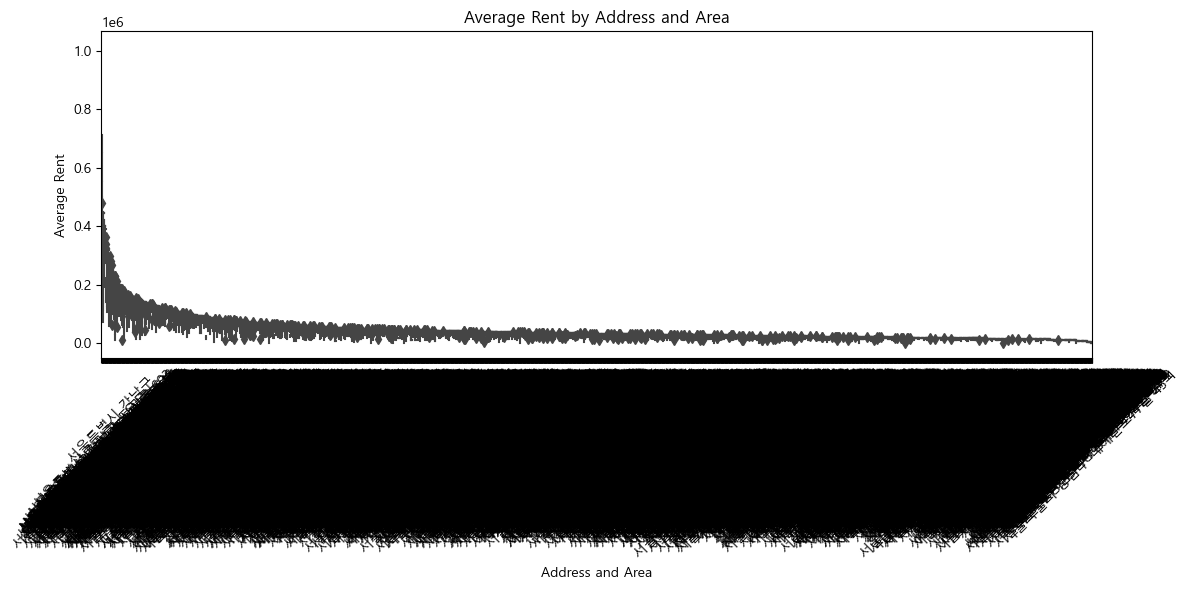

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Address', y='y', data=grouped_data)
plt.title('Average Rent by Address and Area')
plt.xlabel('Address and Area')
plt.ylabel('Average Rent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

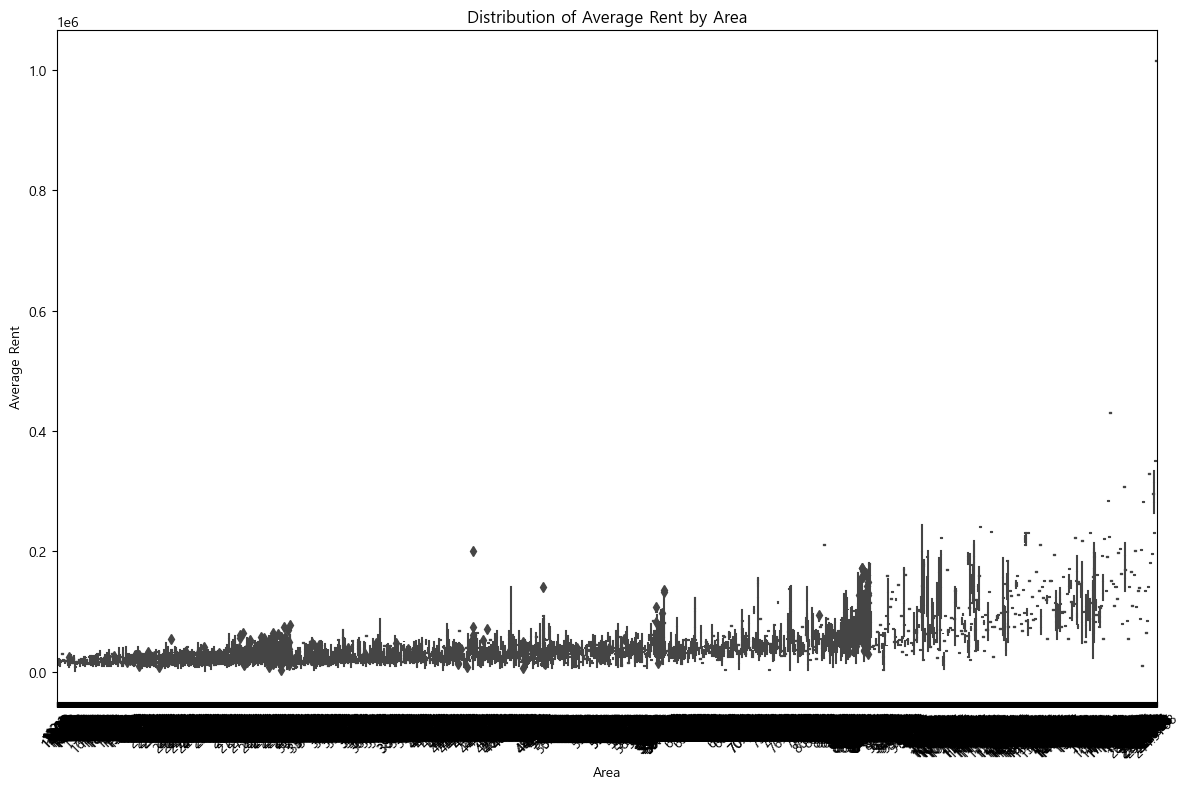

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 주소와 지역에 따른 전세금 평균 데이터 생성
grouped_data = df.groupby(['Address', 'Area'])['y'].mean().sort_values(ascending=False).reset_index()

# 상자 그림 생성
plt.figure(figsize=(12, 8))
sns.boxplot(x='Area', y='y', data=grouped_data)
plt.title('Distribution of Average Rent by Area')
plt.xlabel('Area')
plt.ylabel('Average Rent')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.show()

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
data = pd.read_csv('강남구전세데이터_찐마지막.csv')

# 필요한 열 선택
selected_columns = ['Address', 'Area', 'y']
df = data[selected_columns]

# 특정 지역만 선택 (예: 강남구, 서초구)
target_areas = ['강남구', '서초구']
df = df[df['Area'].isin(target_areas)]

# 주소와 지역에 따른 전세금 평균 피벗 테이블 생성
grouped_data = df.groupby(['Address', 'Area'])['y'].mean().sort_values(ascending=False).reset_index()
pivot_table = grouped_data.pivot_table(index='Address', columns='Area', values='y')

# 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Average Rent by Address and Area')
plt.xlabel('Area')
plt.ylabel('Address')
plt.xticks(rotation=45)
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1000x600 with 0 Axes>

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
data = pd.read_csv('강남구전세데이터_찐마지막.csv')  # 파일 경로를 적절히 수정하세요

# 필요한 열 선택
selected_columns = ['Address', 'Area', 'y']
df = data[selected_columns]

# 특정 지역만 선택 (예: 강남구, 서초구)
target_areas = ['강남구', '서초구']
df = df[df['Area'].isin(target_areas)]

# 주소와 지역에 따른 전세금 평균 피벗 테이블 생성
grouped_data = df.groupby(['Address', 'Area'])['y'].mean().sort_values(ascending=False).reset_index()
pivot_table = grouped_data.pivot_table(index='Address', columns='Area', values='y')

# 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Average Rent by Address and Area')
plt.xlabel('Area')
plt.ylabel('Address')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1000x600 with 0 Axes>

In [31]:
print(pivot_table)

Empty DataFrame
Columns: []
Index: []
